In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
# change the path to where your CSV is saved
df = pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

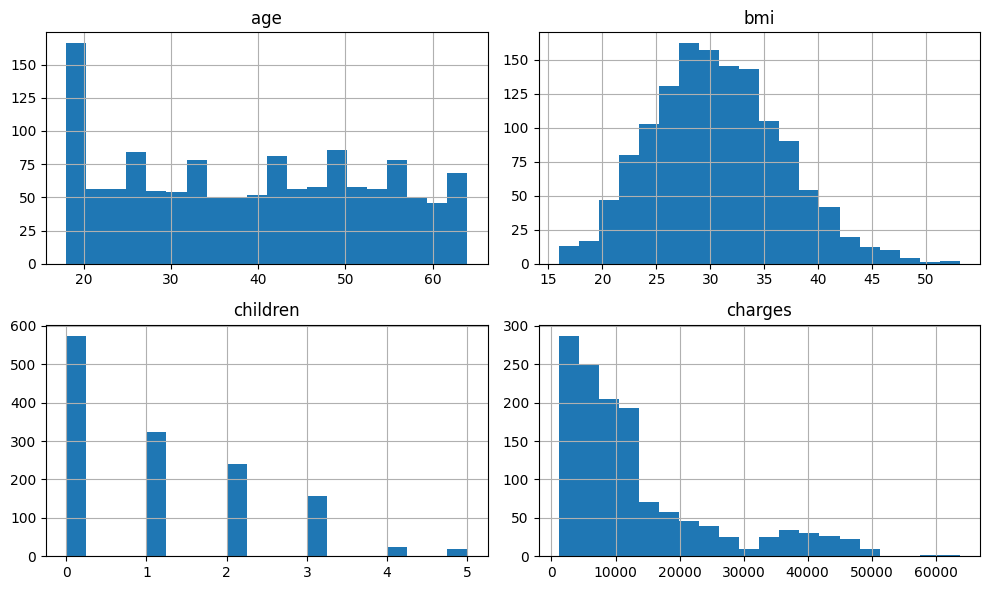

In [4]:
num_cols = ["age", "bmi", "children", "charges"]

df[num_cols].hist(bins=20, figsize=(10,6))
plt.tight_layout()
plt.show()


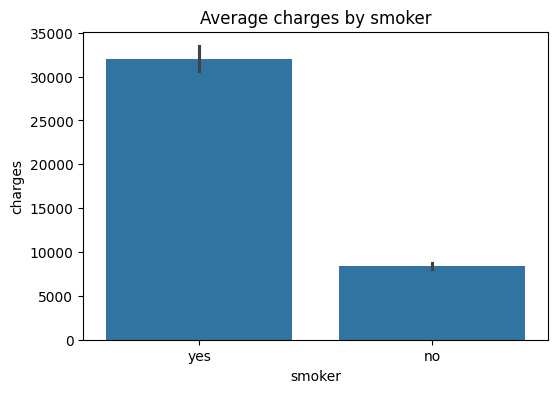

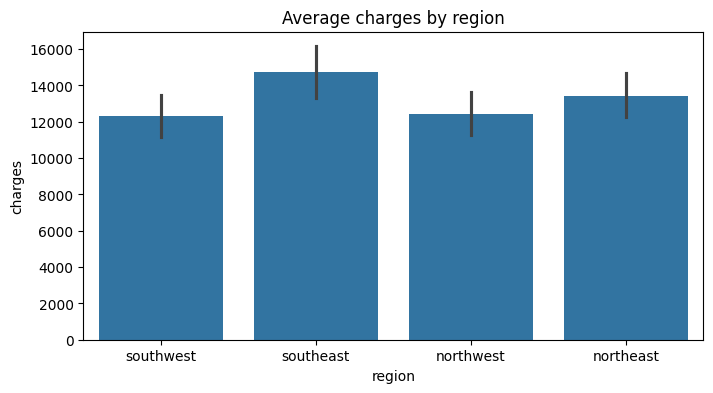

In [5]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="smoker", y="charges")
plt.title("Average charges by smoker")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(data=df, x="region", y="charges")
plt.title("Average charges by region")
plt.show()


In [6]:
X = df.drop(columns=["charges"])
y = df["charges"]

X = pd.get_dummies(X, drop_first=True)
X.head(10)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
5,31,25.740,0,False,False,False,True,False
6,46,33.440,1,False,False,False,True,False
7,37,27.740,3,False,False,True,False,False
8,37,29.830,2,True,False,False,False,False
9,60,25.840,0,False,False,True,False,False


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape


((1070, 8), (268, 8))

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

mse_lr  = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr  = metrics.mean_absolute_error(y_test, y_pred_lr)
r2_lr   = metrics.r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MSE :", mse_lr)
print("RMSE:", rmse_lr)
print("MAE :", mae_lr)
print("R^2 :", r2_lr)


Linear Regression
MSE : 33596915.85136149
RMSE: 5796.284659276275
MAE : 4181.194473753654
R^2 : 0.7835929767120722


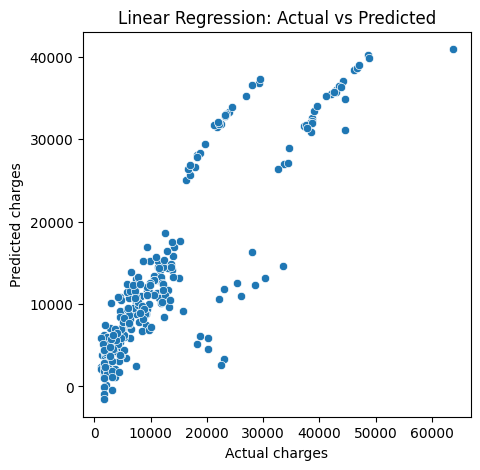

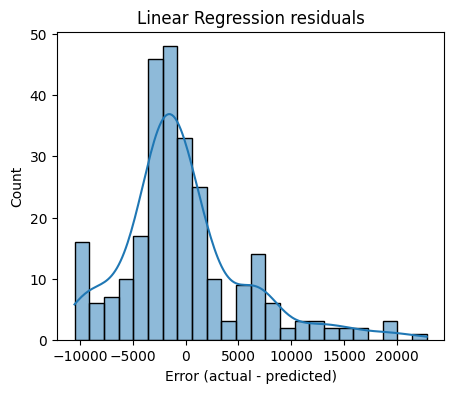

In [10]:
# 1) Actual vs predicted
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# 2) Residuals distribution
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(5,4))
sns.histplot(residuals_lr, kde=True)
plt.title("Linear Regression residuals")
plt.xlabel("Error (actual - predicted)")
plt.show()


In [11]:
# metrics table
results = pd.DataFrame({
    "Model": ["Linear Regression", "KNN"],
    "MSE":  [mse_lr, mse_knn],
    "RMSE": [rmse_lr, rmse_knn],
    "MAE":  [mae_lr, mae_knn],
    "R2":   [r2_lr, r2_knn]
})
results


NameError: name 'mse_knn' is not defined